# Set up

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20)
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv(f'__datasets/PJMW_hourly.csv')
df

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0
...,...,...
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0


# Dataset

In [2]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.sort_index(inplace = True)
df.rename(columns = {'PJMW_MW': 'Target'}, inplace = True)
df

,Target
Datetime,
2002-04-01 01:00:00,4374.0
2002-04-01 02:00:00,4306.0
2002-04-01 03:00:00,4322.0
2002-04-01 04:00:00,4359.0
2002-04-01 05:00:00,4436.0
...,...
2018-08-02 20:00:00,6545.0
2018-08-02 21:00:00,6496.0
2018-08-02 22:00:00,6325.0


In [3]:
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['week_of_year'] = pd.Index(df.index.isocalendar().week)
df['week_of_year'] = df['week_of_year'].astype(int)
df['day'] = df.index.day
df['day_of_year'] = df.index.dayofyear
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour
df

,Target,year,quarter,month,week_of_year,day,day_of_year,day_of_week,hour
Datetime,,,,,,,,,
2002-04-01 01:00:00,4374.0,2002,2,4,14,1,91,0,1
2002-04-01 02:00:00,4306.0,2002,2,4,14,1,91,0,2
2002-04-01 03:00:00,4322.0,2002,2,4,14,1,91,0,3
2002-04-01 04:00:00,4359.0,2002,2,4,14,1,91,0,4
2002-04-01 05:00:00,4436.0,2002,2,4,14,1,91,0,5
...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,6545.0,2018,3,8,31,2,214,3,20
2018-08-02 21:00:00,6496.0,2018,3,8,31,2,214,3,21
2018-08-02 22:00:00,6325.0,2018,3,8,31,2,214,3,22


# CV

In [5]:
num_of_rows = 100_000
train = df[:num_of_rows]
test = df[num_of_rows:]

## Rolling forecast

(200, 9)
(100, 9)


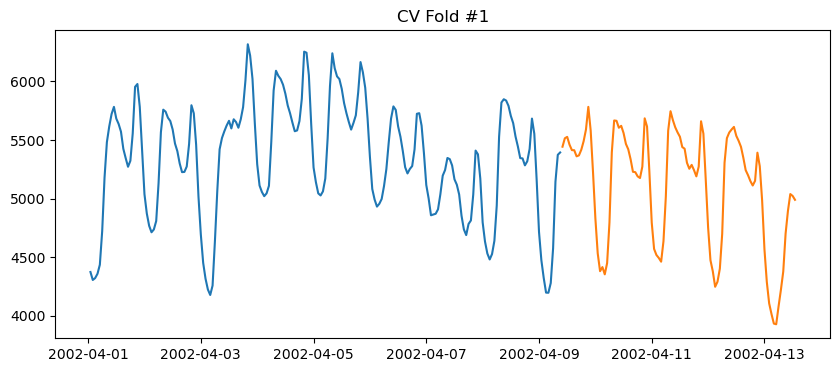

(250, 9)
(100, 9)


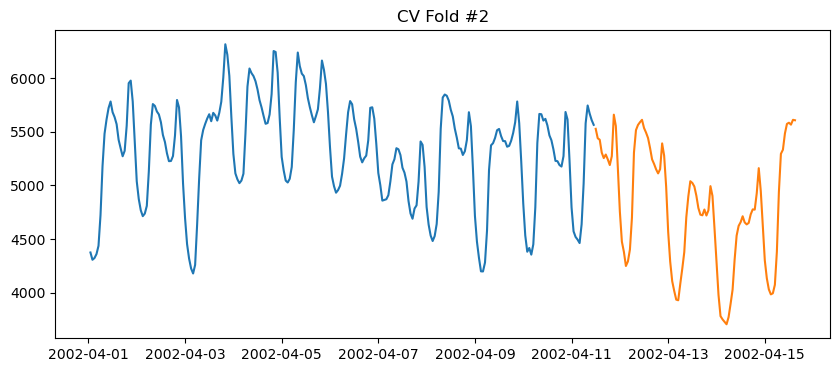

(300, 9)
(100, 9)


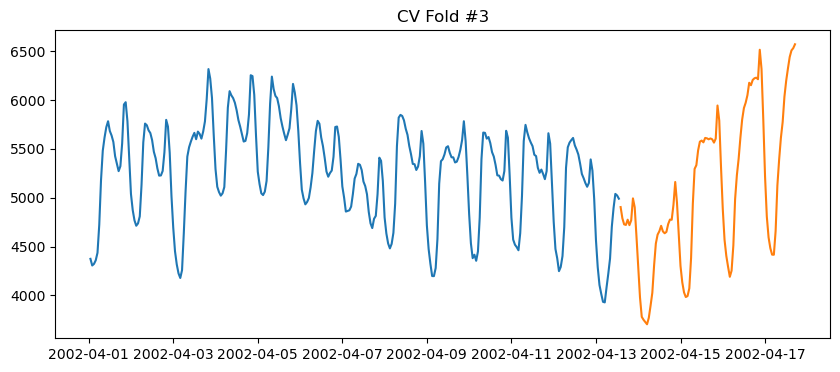

(350, 9)
(100, 9)


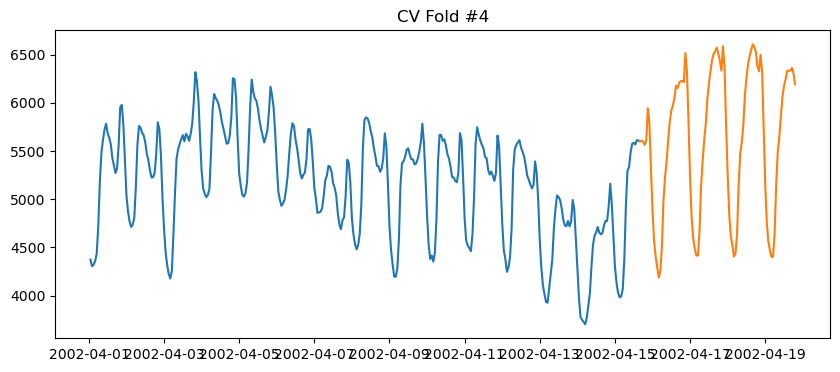

(400, 9)
(100, 9)


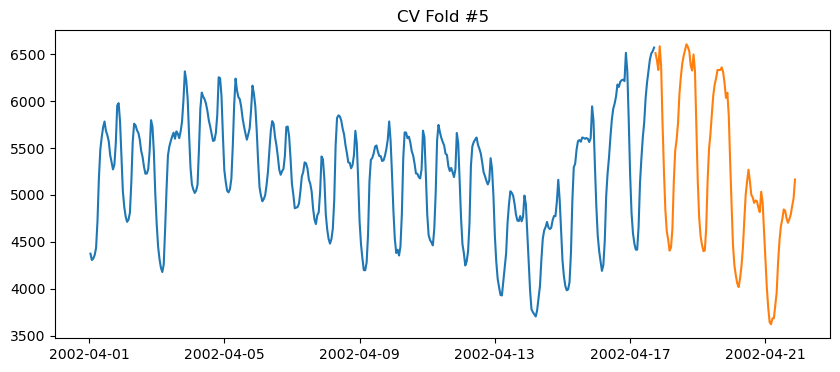

(450, 9)
(100, 9)


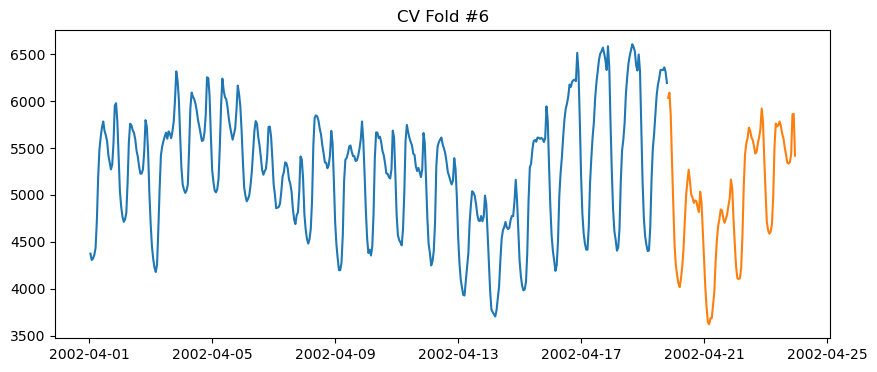

(500, 9)
(100, 9)


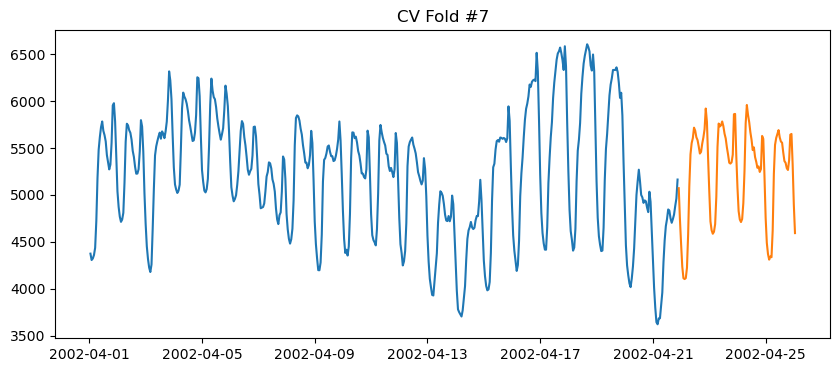

(550, 9)
(100, 9)


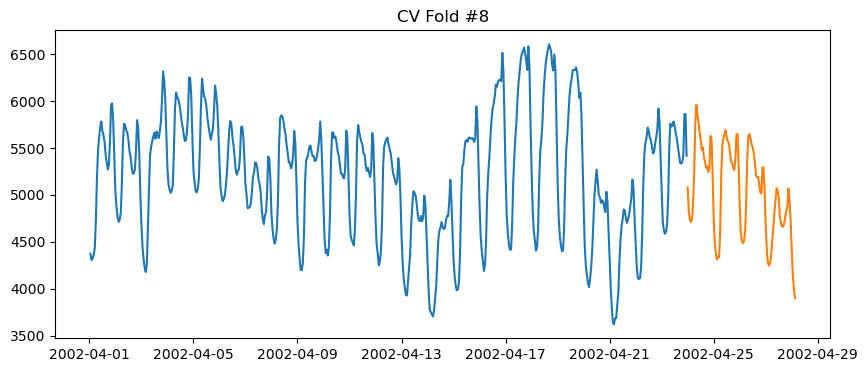

(600, 9)
(100, 9)


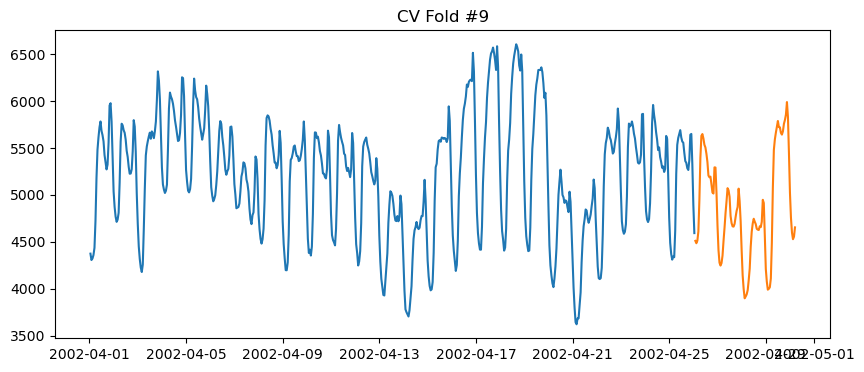

(650, 9)
(100, 9)


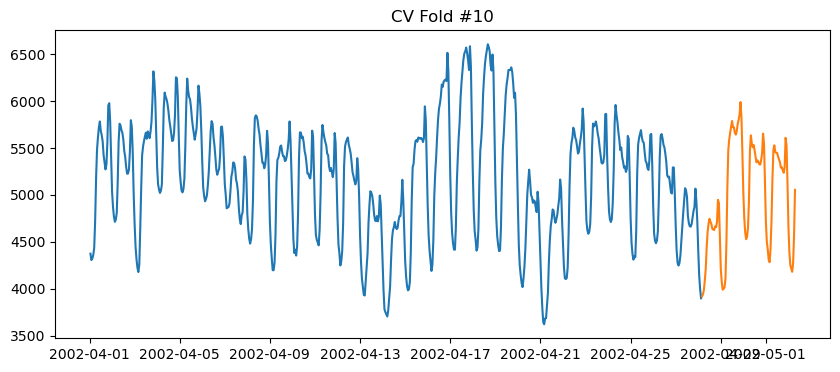

In [6]:
def rolling_forecast_origin(train, min_train_size, horizon, step):
    for i in range(0, len(train) - min_train_size - horizon + 1, step):
        split_train = train[:min_train_size + i]
        split_val = train[min_train_size + i : min_train_size + i + horizon]
        yield split_train, split_val

cv_rolling = rolling_forecast_origin(train, 200, 100, 50)

i = 1
for cv_train, cv_val in cv_rolling:
    print(cv_train.shape)
    print(cv_val.shape)
    plt.figure(figsize = (10, 4))
    plt.title(f'CV Fold #{i}')
    plt.plot(cv_train['Target'])
    plt.plot(cv_val['Target'])
    plt.show()
    if i == 10:
        break
    i += 1

## Sliding forecast

(200, 9)
(100, 9)


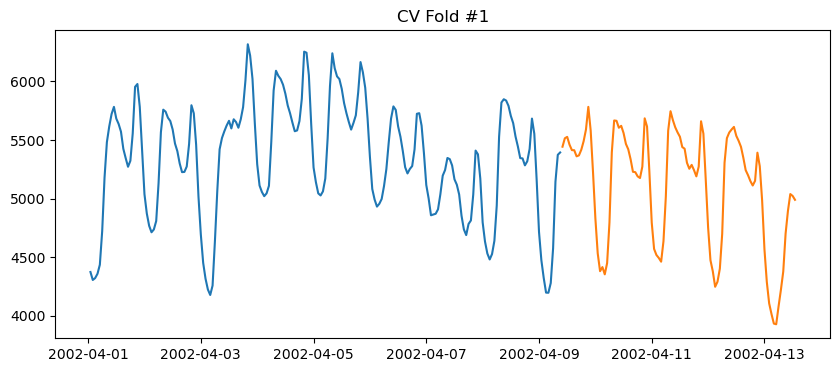

(200, 9)
(100, 9)


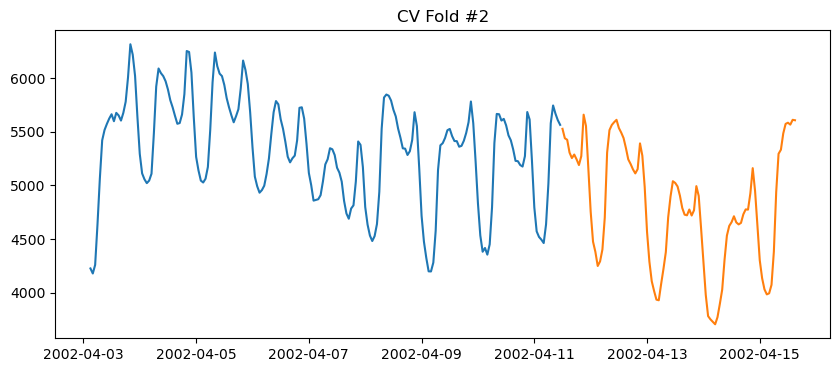

(200, 9)
(100, 9)


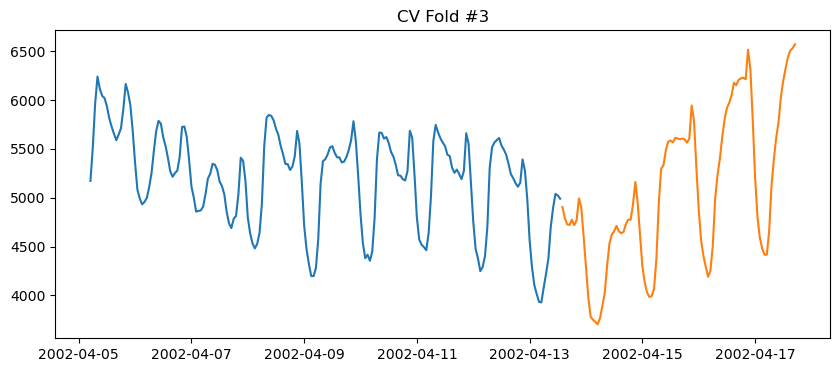

(200, 9)
(100, 9)


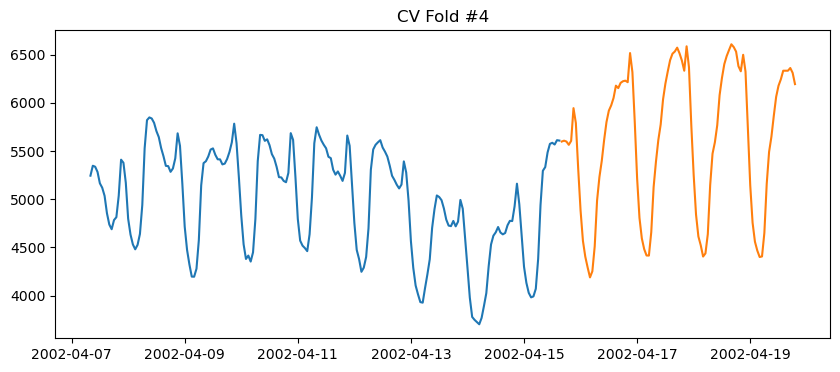

(200, 9)
(100, 9)


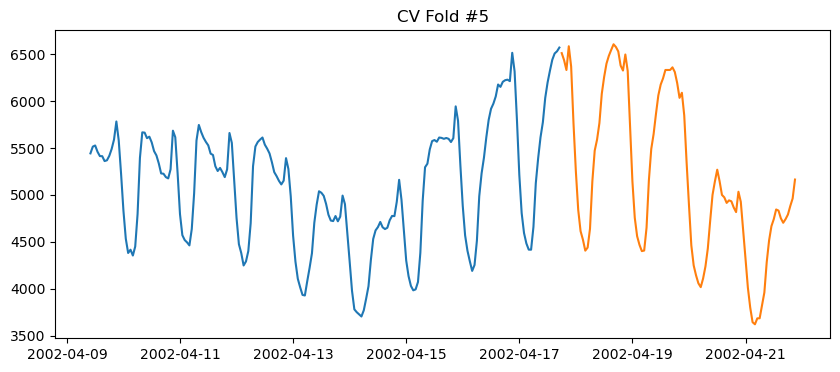

(200, 9)
(100, 9)


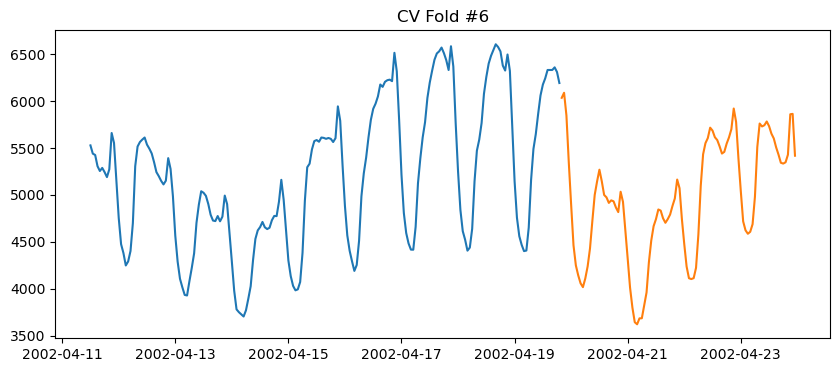

(200, 9)
(100, 9)


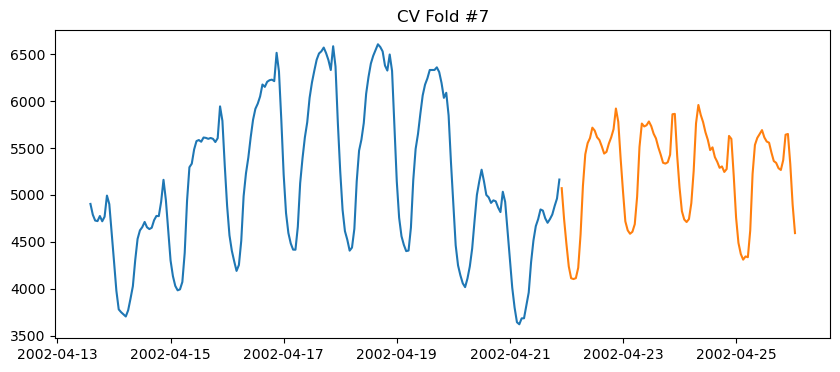

(200, 9)
(100, 9)


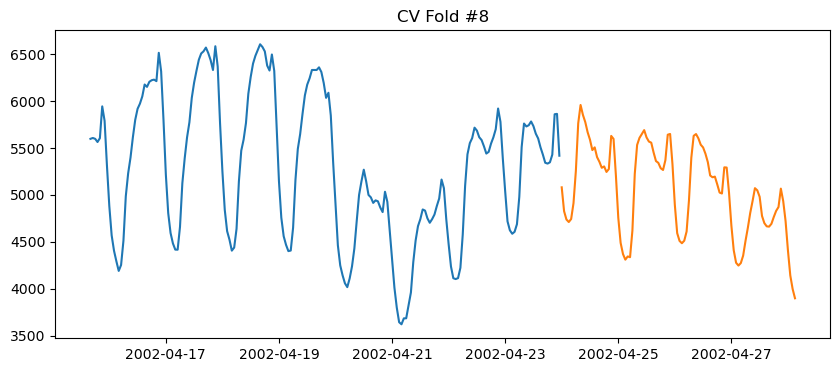

(200, 9)
(100, 9)


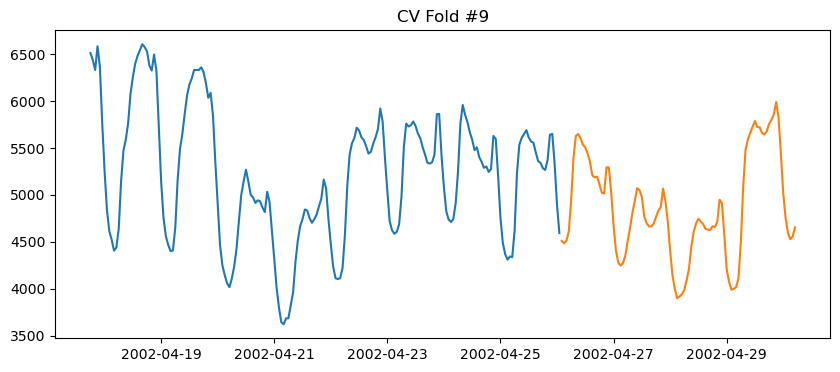

(200, 9)
(100, 9)


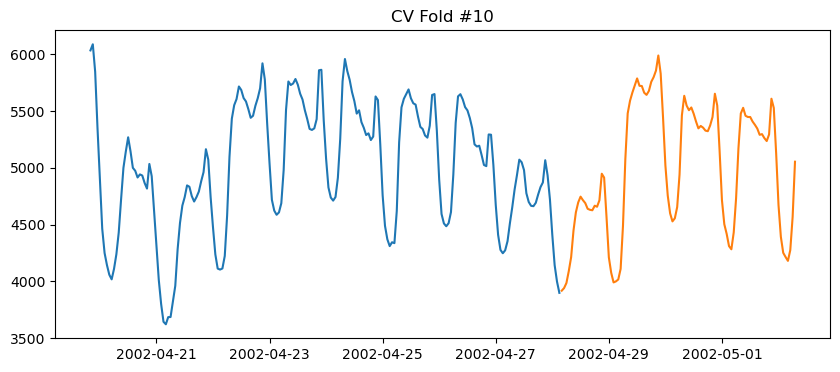

In [7]:
def sliding_window(train, window_size, horizon, step):
    for i in range(0, len(train) - window_size - horizon + 1, step):
        split_train = train[i:window_size + i]
        split_val = train[i + window_size:window_size + i + horizon]
        yield split_train, split_val
        
cv_sliding = sliding_window(train, 200, 100, 50)

i = 1
for cv_train, cv_val in cv_sliding:
    print(cv_train.shape)
    print(cv_val.shape)
    plt.figure(figsize = (10, 4))
    plt.title(f'CV Fold #{i}')
    plt.plot(cv_train['Target'])
    plt.plot(cv_val['Target'])
    plt.show()
    if i == 10:
        break
    i += 1

## CV scoring

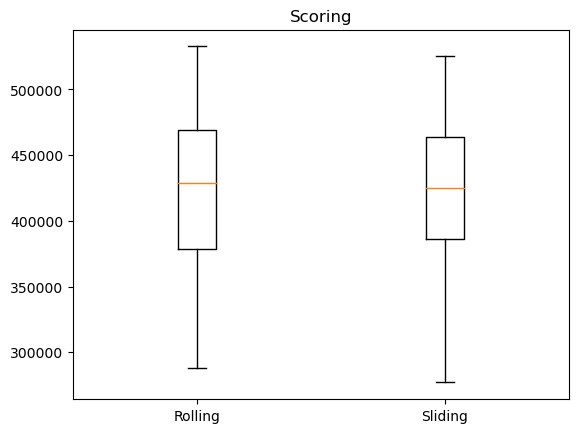

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

def cross_validation_score(model, cv, metric):
    cv_scores = []
    i = 1
    for cv_train, cv_test in cv:
        model.fit(cv_train.drop(columns = 'Target'), cv_train['Target'])
        y_pred = model.predict(cv_test.drop(columns = 'Target'))
        score = metric(y_true = cv_test['Target'], y_pred = y_pred)
        cv_scores.append(score)
        if i == 50:
            break
        i += 1
    return np.array(cv_scores)
        
cv_rolling = rolling_forecast_origin(train, 50_000, 5000, 1000)        
cv_sliding = sliding_window(train, 50_000, 5000, 1000)
model = RandomForestRegressor(n_estimators = 200, n_jobs = -1, random_state = 42)
cv_scores_rolling = cross_validation_score(model, cv_rolling, mse)
cv_scores_sliding = cross_validation_score(model, cv_sliding, mse)
names = ['Rolling', 'Sliding']
results = []
results.append(cv_scores_rolling)
results.append(cv_scores_sliding)
plt.title('Scoring')
plt.boxplot(results, labels = names)
plt.show()